# Problem Set 4

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import seaborn as sns
import random as rand
import quantecon as qe
import statsmodels.api as sm
import pylab
from scipy.stats import gaussian_kde
import math
from IPython.display import display, Latex
import warnings
import sympy as sp
from scipy import optimize
import time
from sympy import symbols, diff, solve, pprint, Sum, IndexedBase, init_printing
from scipy.optimize import fsolve
from sympy import *

os.chdir("/Users/arthurjohnson/Library/CloudStorage/OneDrive-UniversityofEdinburgh/Year 4/PNM for Economics/PNM-for-Econ-Group-1")

## Exercise 1
### Exercise 1a:
Define the Rosenbrock function for a general number of variables N (by creating the function as opposed to importing it)

In [21]:
# Define the Rosenbrock function

def rosen_func(X):
    Y = []
    for i in range(len(X)-1):
        Yi = (1 - X[i])**2 + (X[i+1] - X[i]**2)**2
        Y.append(Yi)
    return sum(Y)

## Exercise 1b:
Testing the Brute-force algorithm. Using a range of (−2,2) for all xi, find the minimum of the Rosen- brock function using the brute-force method for the three following cases: N = 3, N = 4, and N = 5. How does computational time increases as the number of variables N increases?
For the rest of the exercises use an initial value of zero for all the variables. That is $x_0 = [x_{01}, x_{02}, .., x_{0N} ] = [0, 0, ..., 0]$.


In [22]:
N = (3,4,5)

print('Brute-force method ---------')
for i in N:
    print(f'\n--------- \nN = {i}:\n')
    ranges_X = ([(-2,2)]*i)
    qe.tic()
    res1 = optimize.brute(rosen_func, ranges_X)
    qe.toc()
    print(res1)
    print(f'\nMinimium f(x) when N = {i} is', rosen_func(res1), '≈', rosen_func(res1).round(4))

Brute-force method ---------

--------- 
N = 3:

TOC: Elapsed: 0:00:0.02
[1.00000773 1.00000816 0.99998657]

Minimium f(x) when N = 3 is 1.0641134812648927e-09 ≈ 0.0

--------- 
N = 4:

TOC: Elapsed: 0:00:0.33
[1.00001192 0.99999483 0.99999232 0.9999744 ]

Minimium f(x) when N = 4 is 1.181245701977129e-09 ≈ 0.0

--------- 
N = 5:

TOC: Elapsed: 0:00:7.71
[1.00002079 1.00002544 1.00002247 1.00002408 0.99997355]

Minimium f(x) when N = 5 is 9.23421240122741e-09 ≈ 0.0


The time taken to run the brute-force optimisation increases in an exponential manner.

## Exercise 1c:
Testing local optimization algorithms. Find the minimum of the Rosenbrock function with N = 30 for the following three cases: using the BFGS method, using the Nelder-Mead method, and using the Powell method. Which algorithm performs better?

In [23]:
N = 30
initial_x = N * [0]

method = ['BFGS', 'Nelder-Mead', 'Powell']

t = {}

for i in method:
    print(f'\n------------------ \nMethod = {i}:\n')
    qe.tic()
    res2 = optimize.minimize(rosen_func, initial_x, method = i)
    qe.toc()
    print(f'\nMinimium f(x) when using the {i} method is', res2.fun, '≈', round(res2.fun, 4))
    t[i] = time


------------------ 
Method = BFGS:

TOC: Elapsed: 0:00:0.04

Minimium f(x) when using the BFGS method is 5.1621218968617106e-14 ≈ 0.0

------------------ 
Method = Nelder-Mead:

TOC: Elapsed: 0:00:0.14

Minimium f(x) when using the Nelder-Mead method is 26.88025980941206 ≈ 26.8803

------------------ 
Method = Powell:

TOC: Elapsed: 0:00:0.34

Minimium f(x) when using the Powell method is 9.457569190347289e-21 ≈ 0.0


The Nelder-Mead looks to be at a local-minimum. To address this, by looking at [this](https://codesachin.wordpress.com/2016/01/16/nelder-mead-optimization/) website, they state that:

 "Even though Nelder-Mead tends to optimize the objective fairly fast (with few iterations), it tends to get stuck in local optima. In such cases, it may remain stuck in a sub-optimal neighbourhood for a long time, and the only solution to this is to restart the algorithm. Why this happens is fairly easy to understand. Once the simplex enters a region of local optimum, it will only keep contracting/shrinking, instead of randomly exploring other(far-away) parts of the search space. As a result, its becomes impossible for the algorithm to explore any further."


To get around this, as we know the function, we can adjust the bounds accordingly in the hope that it skirts the local optima.


In [24]:
N = 30
edited_x = N * [0.99]

print('Nelder-Mead method ---------\n')
qe.tic()
res3 = optimize.minimize(rosen_func, edited_x, method = 'nelder-mead') 
bnds_time = qe.toc()
print(f'\nMinimium f(x) when N = {N} is', res3.fun, '≈', res3.fun.round(4))

Nelder-Mead method ---------

TOC: Elapsed: 0:00:0.05

Minimium f(x) when N = 30 is 2.7377524942441838e-08 ≈ 0.0


The Nelder-Mead algorithm struggled with finding the global minimum for the Rosenbrock function, as it often gets stuck in local minima. To help it out, we could use prior knowledge of the function's behaviour to tweak the initial guesses and bounds. By initialising closer to the known minimum, we can artificially 'steer' it.

Without understanding the function's behaviour, we may not know what to adjust, nor understand the implications of such actions.

### Exercise 1d:
Let’s test the algorithms further. Minimize the Rosenbrock function for 100 variables, N=100. Use the BFGS method, the Nelder-Mead method and the Powell method. If N=100 takes too much time in your computer, you can use another N as N=50.

In [25]:
N = 100
initial_x = N * [0]

method = ['BFGS', 'Nelder-Mead', 'Powell']

for i in method:
    print(f'\n------------------ \nMethod = {i}:\n')
    qe.tic()
    res4 = optimize.minimize(rosen_func, initial_x, method = i)
    qe.toc()
    print(f'\nMinimium f(x) when using the {i} method is', res4.fun, '≈', round(res4.fun, 4))


------------------ 
Method = BFGS:

TOC: Elapsed: 0:00:6.84

Minimium f(x) when using the BFGS method is 1.2904979232337444e-11 ≈ 0.0

------------------ 
Method = Nelder-Mead:

TOC: Elapsed: 0:00:2.62

Minimium f(x) when using the Nelder-Mead method is 97.77170705842435 ≈ 97.7717

------------------ 
Method = Powell:

TOC: Elapsed: 0:00:2.21

Minimium f(x) when using the Powell method is 5.91683045463783e-20 ≈ 0.0


We again see that the Nelder-Mead method has been caught in a local optima. We can run the previous adaption again in order to bypass this issue:

In [26]:
N = 100
edited_x = N * [0.99]

print('Nelder-Mead method ---------\n')
qe.tic()
res5 = optimize.minimize(rosen_func, edited_x, method = 'nelder-mead') 
bnds_time = qe.toc()
print(f'\nMinimium f(x) when N = {N} is', res5.fun, '≈', res5.fun.round(4))

Nelder-Mead method ---------

TOC: Elapsed: 0:00:1.69

Minimium f(x) when N = 100 is 1.6071944545823442e-07 ≈ 0.0


### Exercise 1e:
Algorithms comparison. For this exercise we see that there is one algorithm that tends to to do better than the rest (especially when N is large). Which algorithm is and why?

We see that the Nelder-Mead algorithm tends to do better (in terms of speed), especially when N is large. However, as already stated, the Nelder-mead method often catches on a local optima. The Powell method is then the second fastest (and finds the global optima), followed by the BFGS.

When N increased to 100, for BFGS, Nelder-Mead, and Powell, we derived the answer in  11.04s, 2.61s, and 1.37s, respectively.

We can clearly see how the computation time for the respective algorithms diverge from one another as N increases.

We have plotted line graphs of the computation times of varying Ns to see how the respective algorithms diverge from one another.

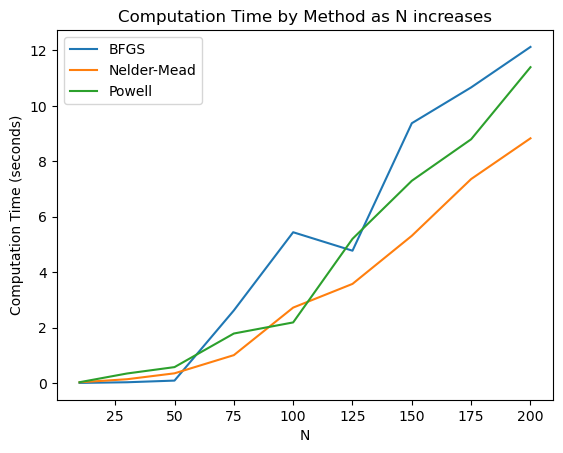

In [27]:
# Set N values
N_values = [10, 30, 50, 75, 100, 125, 150, 175, 200]
methods = ['BFGS', 'Nelder-Mead', 'Powell']

# Store times
times = {method: [] for method in methods}

# Loop N values
for N in N_values:
    initial_x = np.zeros(N)
    
    # Loop over Ns
    for method in methods:
        start_time = time.time()
        res = optimize.minimize(rosen_func, initial_x, method=method)
        end_time = time.time()
        
        # Compute and store computation time
        times[method].append(end_time - start_time)

# Plot values
for method in methods:
    plt.plot(N_values, times[method], label=method)

plt.xlabel('N')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time by Method as N increases')
plt.legend()
plt.show()

## Exercise 2
### Exercise 2a:
Given that each firm maximizes its profits taking as given the other firm’s output, find the first order
conditions of each firm.

In [28]:
#Define symbols
q_1, q_2, alpha, c_1, c_2= sp.symbols('q_1 q_2 alpha c_1 c_2')

#Define inverse demand function
def P(q):
    return q**(-alpha)

#Define the quadratic cost functions
def C_1(c_1, q_1):
    return (1/2)*c_1*q_1**2

def C_2(c_2, q_2):
    return (1/2)*c_2*q_2**2

#Define profit functions
def pi_1(q_1, q_2, alpha, c_1):
    return P(q_1 + q_2)*q_1 - C_1(c_1, q_1)

def pi_2(q_1, q_2, alpha, c_2):
    return P(q_1 + q_2)*q_2 - C_2(c_2, q_2)

# Define the function in terms of SymPy symbols
pi_1 = pi_1(q_1, q_2, alpha, c_1)
pi_2 = pi_2(q_1, q_2, alpha, c_2)

# Compute partial derivative
FOC_1 = sp.diff(pi_1, q_1)
FOC_2 = sp.diff(pi_2, q_2)

print("First Order Condition 1:", FOC_1)
print("First Order Condition 2:", FOC_2)

First Order Condition 1: -alpha*q_1/((q_1 + q_2)*(q_1 + q_2)**alpha) - 1.0*c_1*q_1 + (q_1 + q_2)**(-alpha)
First Order Condition 2: -alpha*q_2/((q_1 + q_2)*(q_1 + q_2)**alpha) - 1.0*c_2*q_2 + (q_1 + q_2)**(-alpha)


## Exercise 2b:
Find the Cournot equilibrium (q1∗, q2∗, p∗). Solve the system equations given by the previous first or- der conditions and report the equilibrium quantities of q1∗ and q2∗ and equilbrium price p∗. Provide an interpretation of the results.

In [29]:
# Given parameterization
alpha = 0.625
c_1 = 0.6
c_2 = 0.8

def equilibrium(q):
    q_1, q_2 = q
    eq_1 = -1.0*c_1*q_1 - q_1*alpha/((q_1 + q_2)*(q_1 + q_2)**alpha) + (q_1 + q_2)**(-alpha)
    eq_2 = -1.0*c_2*q_2 - q_2*alpha/((q_1 + q_2)*(q_1 + q_2)**alpha) + (q_1 + q_2)**(-alpha)
    return np.array([eq_1, eq_2])

s0 = [0.1, 1]  # initial guess
root = fsolve(equilibrium, s0)
print("Equilibrium quantities (q_1, q_2):", root)
price = P(0.8395676 + 0.68879643)
print("Equilibrium price:", price)

Equilibrium quantities (q_1, q_2): [0.8395676  0.68879643]
Equilibrium price: 0.7671110611479931


### Exercise 2c:
Create a function that for N>1 computes the set of N first order conditions that characterize the Cournot equilibrium quantities.

In [30]:
def cournot_focs(N):
    # Define symbols
    q = sp.symbols(' '.join([f'q_{i}' for i in range(1, N + 1)]))
    alpha = sp.symbols('alpha')
    c = sp.symbols('c:' + str(N + 1))
        
    # Define inverse demand function
    P = 1 / sp.Add(*[q[i] for i in range(N)])**alpha

    # Define profit functions
    pi = [P * q[i] - (1/2) * c[i] * q[i]**2 for i in range(N)]

    # Compute first-order conditions
    focs = [sp.diff(pi[i], q[i]) for i in range(N)]

    return np.array(focs)

## Exercise 2d:
Compute the Cournot equilibrium(qi,p) under 3 firms with cost parameters c=[0.6,0.8,0.5] and under 6 firms with c = [0.6, 0.8, 0.5, 0.5, 0.4, 0.2].

In [31]:
#Define function which takes N as input and produces N FOCs and Solves for Cournot Equilibrium
def cournot_equilibrium(N, alpha_val, c_vals):
    # Define symbols
    q = sp.symbols(f'q_1:{N+1}')
    alpha = sp.symbols('alpha')
    c = sp.symbols(f'c_1:{N+1}')
    
    # Define inverse demand function
    P = 1 / sum(q)**alpha
    
    # Define profit functions for each firm
    pi = [P * q[i] - c[i] * q[i]**2 / 2 for i in range(N)]
    
    # Compute first-order conditions (FOCs)
    focs = [sp.diff(pi[i], q[i]).subs(alpha, alpha_val).subs({c[i]: c_vals[i] for i in range(N)}) for i in range(N)]
    
    # Convert FOCs to a lambda function for numerical solving
    focs_lambdas = [sp.lambdify(q, foc) for foc in focs]
    
    def system_of_equations(q_vals):
        return [f(*q_vals) for f in focs_lambdas]
    
    # Initial guess for quantities
    q_guess = np.full(N, 0.1)
    
    # Solve for equilibrium quantities
    q_eq = fsolve(system_of_equations, q_guess)
    
    # Print equilibrium quantities
    for i, qe in enumerate(q_eq, 1):
        print(f"Equilibrium quantity for firm {i}: {qe.round(3)}")
    
    # Calculate and print equilibrium price
    P_eq = 1 / sum(q_eq)**alpha_val
    print(f"Equilibrium price: {P_eq.round(3)}\n")

# Compute the Results for N=3
N = 3  # Number of firms
alpha_val = 0.625
c_vals = [0.6, 0.8, 0.5]  # Cost coefficients for each firm

output = cournot_equilibrium(N, alpha_val, c_vals)

# Compute the Results for N=6
N = 6  # Number of firms
alpha_val = 0.625
c_vals = [0.6, 0.8, 0.5, 0.5, 0.4, 0.2]  # Cost coefficients for each firm

cournot_equilibrium(N, alpha_val, c_vals)

Equilibrium quantity for firm 1: 0.781
Equilibrium quantity for firm 2: 0.618
Equilibrium quantity for firm 3: 0.899
Equilibrium price: 0.595

Equilibrium quantity for firm 1: 0.581
Equilibrium quantity for firm 2: 0.444
Equilibrium quantity for firm 3: 0.687
Equilibrium quantity for firm 4: 0.687
Equilibrium quantity for firm 5: 0.84
Equilibrium quantity for firm 6: 1.512
Equilibrium price: 0.378



## Exercise 2e:
Compute the Cournot equilibrium (qi∗, p∗) for N = 10 and N = 15. Firms are identical with cost parameter c_i =0.6 for all i ∈ N.

In [32]:
# Compute the Results for N=10
N = 3  # Number of firms
alpha_val = 0.625

#Define function to generate array of N items 
def gen_c_vals(N):
    cvals = []
    for i in range(1, N+1):
        cvals.append(0.6)
    return np.array(cvals)

#Generate array for N=10
cvals_10 = gen_c_vals(10)

#Compute FOCs and equilibrium for N=10
cournot_equilibrium(10, alpha_val, cvals_10)

#Generate array for N=10
cvals_15 = gen_c_vals(15)

#Compute FOCs and equilibrium for N=10
cournot_equilibrium(15, alpha_val, cvals_15)

Equilibrium quantity for firm 1: 0.543
Equilibrium quantity for firm 2: 0.543
Equilibrium quantity for firm 3: 0.543
Equilibrium quantity for firm 4: 0.543
Equilibrium quantity for firm 5: 0.543
Equilibrium quantity for firm 6: 0.543
Equilibrium quantity for firm 7: 0.543
Equilibrium quantity for firm 8: 0.543
Equilibrium quantity for firm 9: 0.543
Equilibrium quantity for firm 10: 0.543
Equilibrium price: 0.347

Equilibrium quantity for firm 1: 0.471
Equilibrium quantity for firm 2: 0.471
Equilibrium quantity for firm 3: 0.471
Equilibrium quantity for firm 4: 0.471
Equilibrium quantity for firm 5: 0.471
Equilibrium quantity for firm 6: 0.471
Equilibrium quantity for firm 7: 0.471
Equilibrium quantity for firm 8: 0.471
Equilibrium quantity for firm 9: 0.471
Equilibrium quantity for firm 10: 0.471
Equilibrium quantity for firm 11: 0.471
Equilibrium quantity for firm 12: 0.471
Equilibrium quantity for firm 13: 0.471
Equilibrium quantity for firm 14: 0.471
Equilibrium quantity for firm 15

Since the game is symmetric, meaning that all agents(in this case firms) have the same set of Actions and Utility Function, then the firms must have the same best-reply correspondance and Nash Equilibria.

## Exercise 2f:
Given your previous results, plot the equilibrium prices, p∗, of Cournot oligopolies with number of firms N = 2, 3, 6, 10, 15. Provide an interpretation of the results.

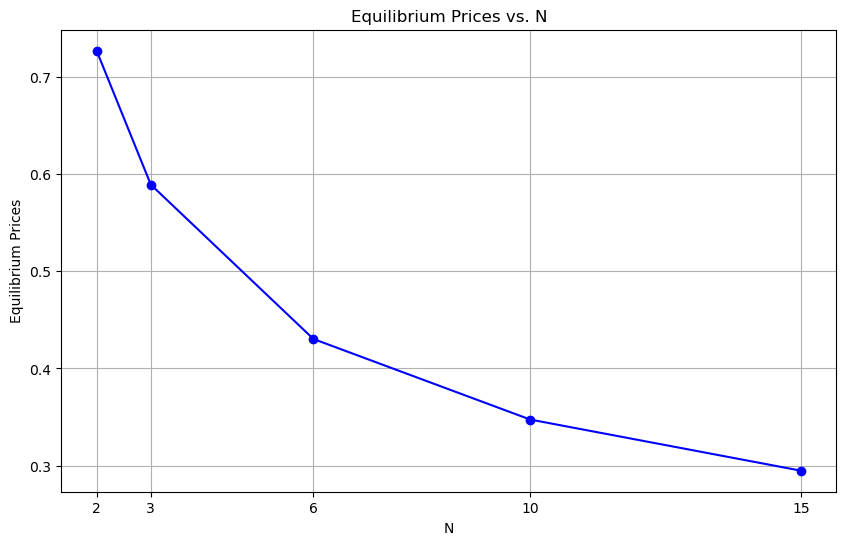

[0.726909278544492, 0.589098005657233, 0.4302875320689913, 0.34740690929791584, 0.2947404675331523]


In [33]:
#Compute Prices for all values

def cournot_equilibrium_price(N, alpha_val, c_vals):
    # Define symbols
    q = sp.symbols(f'q_1:{N+1}')
    alpha = sp.symbols('alpha')
    c = sp.symbols(f'c_1:{N+1}')
    
    # Define inverse demand function
    P = 1 / sum(q)**alpha
    
    # Define profit functions for each firm
    pi = [P * q[i] - c[i] * q[i]**2 / 2 for i in range(N)]
    
    # Compute first-order conditions (FOCs)
    focs = [sp.diff(pi[i], q[i]).subs(alpha, alpha_val).subs({c[i]: c_vals[i] for i in range(N)}) for i in range(N)]
    
    # Convert FOCs to a lambda function for numerical solving
    focs_lambdas = [sp.lambdify(q, foc) for foc in focs]
    
    def system_of_equations(q_vals):
        return [f(*q_vals) for f in focs_lambdas]
    
    # Initial guess for quantities
    q_guess = np.full(N, 0.1)
    
    # Solve for equilibrium quantities
    q_eq = fsolve(system_of_equations, q_guess)
    
    # Calculate and print equilibrium price
    P_eq = 1 / sum(q_eq)**alpha_val
    return P_eq

list_1 = []
M = [2, 3, 6, 10, 15]
for i in M:
    list_1.append(cournot_equilibrium_price(i, alpha_val, cvals_15))


N = [2, 3, 6, 10, 15]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(N, list_1, marker='o', linestyle='-', color='b')
plt.title('Equilibrium Prices vs. N')
plt.xlabel('N')
plt.ylabel('Equilibrium Prices')
plt.grid(True)
plt.xticks(N)  # Ensure all N values are shown
plt.show()
print(list_1)

We observe that as the number of firms increase, the equilibrium price decreases. This result is in line with standard microeconomic theory. When $N > 2$, the equilibrium price will be below the cost and therefore firms will choose not to enter the market as they would lose money.

i.e., if $Price < Cost$, firms will exit the market. Therefore, we will see a maximum of 2 firms in this specific market where the cost is $0.6$

# Exercise 3
## Exercise 3a:

c0* = 7.55
c1* = 7.55
a1* = 2.45


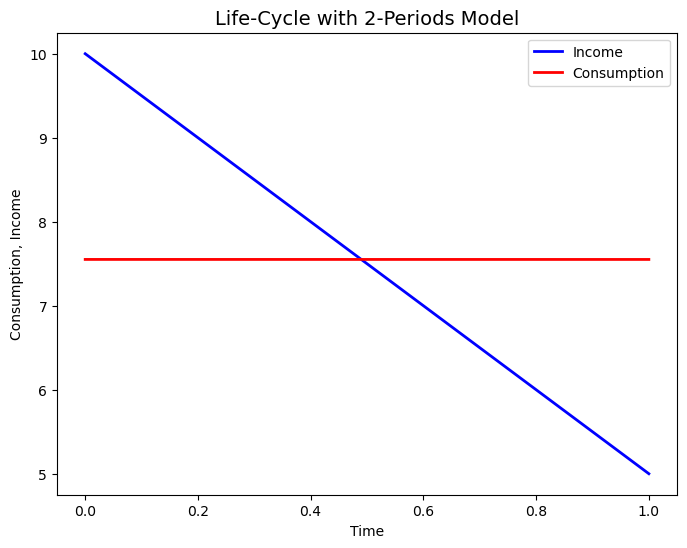

In [34]:
# Parameters
beta = 0.96
r= 1/beta-1
a0 = 0
y = [10, 5]

# Per period utility function
def u_crra(c,theta=1.5):
    if c<0.00001:
        return -np.infty  
    if theta==1:
        return np.log(c) 
    else:
        return  (c**(1-theta))/(1-theta)
params = [u_crra, beta, r, a0, y]

# Lifetime utility
def U(c0,params):
   u, beta, r, a0, y = params  
   c1 = (1+r)*(a0+y[0]-c0)+y[1]
   return -(u(c0)+beta*u(c1))
x0 = y[0]
res = optimize.minimize(U,x0, method='BFGS', args=params)  
c0_star = res.x
c1_star = (1+r)*(a0+y[0]-c0_star)+y[1]
c_star = [c0_star,c1_star]
a1_a = a0+y[0]-c0_star
a_star = [a0,a1_a]

# Printing calculations
print('c0* =',"%.2f" % c0_star)
print('c1* =',"%.2f" % c1_star)
print('a1* =',"%.2f" % a1_a)

# Plotting the lifecycle of income and consumption
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(0,2), y, linewidth=2.0, color='b',label='Income')
ax.plot(range(0,2), c_star, linewidth=2.0, color='r',label='Consumption')
ax.set_xlabel('Time')
ax.set_ylabel('Consumption, Income')
ax.legend()
ax.set_title('Life-Cycle with 2-Periods Model', fontsize=14)
plt.show()

Over the two periods, consumption is successfully smoothed due to the relative risk aversion parameter, theta = 1.5, which implies a convex form of the utility function. In the case of a negative theta the agent would undertake risk seeking behaviour and would optimise by consuming everything in one period. In this case in both periods, the agent consumes circa. 7.55, and is left with savings circa. 2.46 in period 1, which they consume. Therefore, the agent sacrifices some consumption in period 0 for the interest gained in period 1 because they are only slightly impatient as utility in the final period is discounted by beta, which is close to 1.

In [35]:
## Exercise 3b:

c0* = 7.55
c1* = 7.55
c2* = 7.55
c3* = 7.55
a0* = 0.00
a1* = -2.55
a2* = -0.20
a3* = 7.25


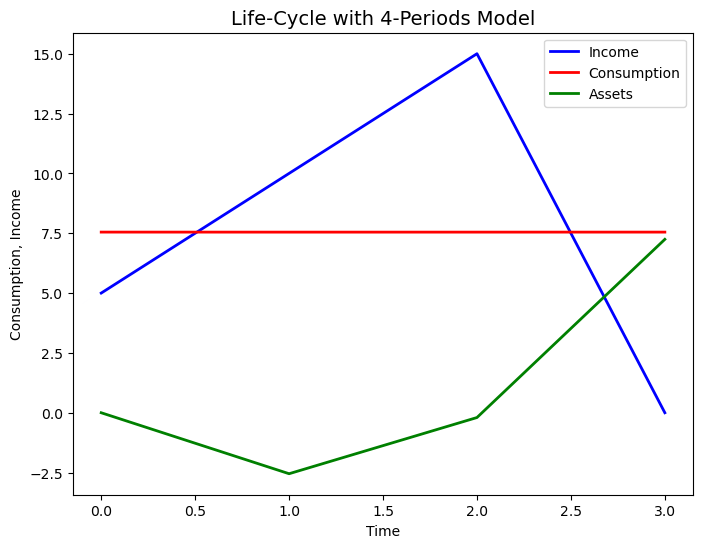

In [36]:
# Additional parameters
y = [5, 10, 15, 0]
params = [u_crra, beta, r, a0, y]

# Lifetime utility
def U_t4(C,params):
   u, beta, r, a0, y = params  
   c0, c1, c2 = C
   a1 = a0 +y[0] -c0
   a2 = (1+r)*(a1)+y[1] -c1
   c3 = (1+r)*((1+r)*a2+y[2]-c2)   
   return -(u(c0) +beta*u(c1) +beta**2*u(c2) +beta**3*u(c3))

# Educated initial guess
x0 = [8,8,8]
res = optimize.minimize(U_t4,x0, method='BFGS', args=params)  
c0_star, c1_star, c2_star = res.x
a1 = a0 +y[0] -c0_star
a2 = (1+r)*(a1)+y[1] -c1_star
c3_star = (1+r)*((1+r)*a2+y[2]-c2_star)
a3 = (1+r)*a2+y[2]-c2_star
c_star = [c0_star,c1_star,c2_star,c3_star]
a1 = a0+y[0]-c0_star
a_star = [a0,a1,a2,a3]

# Printing calculations
print('c0* =', "%.2f" % c0_star)
print('c1* =', "%.2f" % c1_star)
print('c2* =', "%.2f" % c2_star)
print('c3* =',"%.2f" % c3_star)
print('a0* =',"%.2f" % a0)
print('a1* =',"%.2f" % a1)
print('a2* =',"%.2f" % a2)
print('a3* =',"%.2f" % a3)

# Plotting the lifecycle of income, consumption, and assets
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(0,4), y, linewidth=2.0, color='b',label='Income')
ax.plot(range(0,4), c_star, linewidth=2.0, color='r',label='Consumption')
ax.plot(range(0,4), a_star, linewidth=2.0, color='g',label='Assets')
ax.set_xlabel('Time')
ax.set_ylabel('Consumption, Income')
ax.legend()
ax.set_title('Life-Cycle with 4-Periods Model', fontsize=14)
plt.show()

In [37]:
## Exercise 3c:

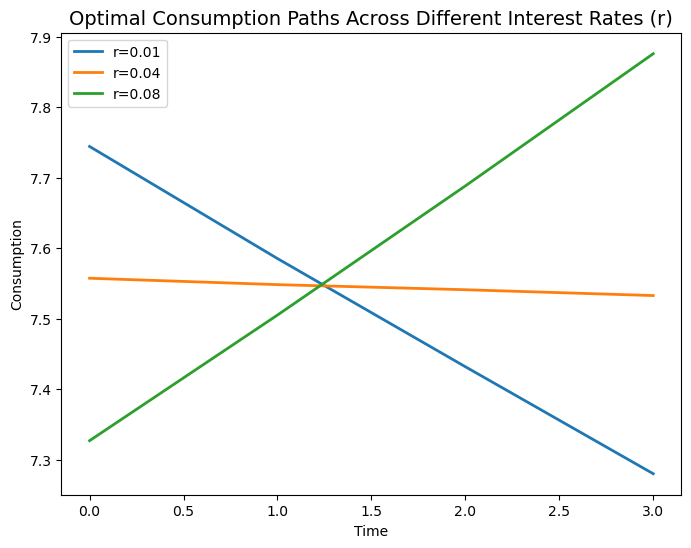

In [38]:
# Comparative statics
y = [5, 10, 15, 0]
c_vecs=[]
a_vecs=[]
r_list = [0.01, 0.04, 0.08]
for r in r_list:
    params = [u_crra, beta, r, a0, y]
    x0 = [8,8,8]
    res = optimize.minimize(U_t4,x0, method='BFGS', args=params)  
    c0_star, c1_star, c2_star = res.x
    a1 = a0 +y[0] -c0_star
    a2 = (1+r)*(a1)+y[1] -c1_star
    c3_star = (1+r)*((1+r)*a2+y[2]-c2_star)
    a3 = (1+r)*a2+y[2]-c2_star
    c_star = [c0_star,c1_star,c2_star,c3_star]
    a1 = a0+y[0]-c0_star
    a_star = [a1,a2,a3,0]
    c_vecs.append(c_star)
    a_vecs.append(a_star)

# Plotting the optimal consumption paths across different interest rates
fig, ax = plt.subplots(figsize=(8,6))
for i,r in enumerate(r_list):
    ax.plot(range(0,4), c_vecs[i], linewidth=2.0,label='r='+str(r))
ax.set_xlabel('Time')
ax.set_ylabel('Consumption')
ax.legend()
ax.set_title('Optimal Consumption Paths Across Different Interest Rates (r)', fontsize=14)
plt.show()

In the case of r=0.01, the returns of savings are lower than the impatience factor as the individual optimally consumes more today than tomorrow. However, in the case of r=0.04 the returns of savings is close to the disutlity cost of saving thus meaning that consumption is close to flat along the life-cycle. Finally, in the case of r=0.08 the consumer is better off consuming more tomorrow than today meaning consumption increases overtime.

In [39]:
## Exercise 3d:

c1*h= 10.08
c1*l= 5.58


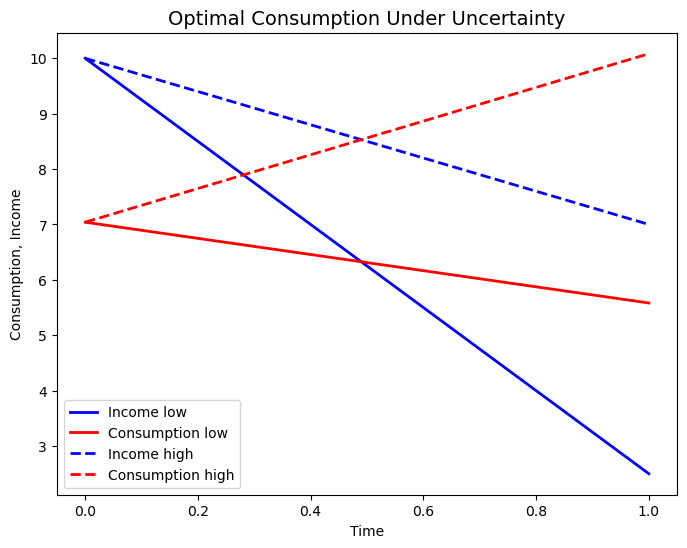

In [40]:
# Parameters
beta = 0.96
r= 1/beta-1
a0 = 0
y0 = 10
p_y1 = [0.5, 0.5]
y1 = [2.5, 7,5]

# Lifetime utility function
def U(c0,params):
   u, beta, r, a0, y0, y1, p_y1 = params  
   c1_1 = (1+r)*(a0+y0-c0)+y1[0]
   c1_2 = (1+r)*(a0+y0-c0)+y1[1]
   return -(u(c0)+beta*(np.sum(p_y1[0]*u(c1_1) +p_y1[1]*u(c1_2))))
params = [u_crra, beta, r, a0, y0, y1, p_y1]
x0 = y0
res = optimize.minimize(U,x0, method='BFGS', args=params)  
c0_star = res.x
c1_starl = (1+r)*(a0+y0-c0_star)+y1[0]
c1_starh = (1+r)*(a0+y0-c0_star)+y1[1]
c_star_l = [c0_star,c1_starl]
c_star_h = [c0_star,c1_starh]
a1 = a0+y0-c0_star
a_star = [a0,a1]

# Printing calculations
print('c1*h=',"%.2f" % c1_starh)
print('c1*l=',"%.2f" % c1_starl)

# Plotting the lifecycle of income and consumption
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(0,2), [y0, y1[0]], linewidth=2.0, color='b',label='Income low')
ax.plot(range(0,2), c_star_l, linewidth=2.0, color='r',label='Consumption low')
ax.plot(range(0,2), [y0, y1[1]], linewidth=2.0, color='b', linestyle='dashed',label='Income high')
ax.plot(range(0,2), c_star_h, linewidth=2.0, color='r',linestyle='dashed',label='Consumption high')
ax.set_xlabel('Time')
ax.set_ylabel('Consumption, Income')
ax.legend()
ax.set_title('Optimal Consumption Under Uncertainty', fontsize=14)
plt.show()

In [41]:
## Exercise 3e:

In [42]:
# Calculations
print('Optimal savings under certainty: ''a1* =',"%.2f" % a1_a)
print('Optimal savings under uncertainty: ''a1* =',"%.2f" % a1)
g_a = (a1-a1_a)/a1_a*100
print('Percentage increase in savings: '"%.2f" % g_a,'%')

Optimal savings under certainty: a1* = 2.45
Optimal savings under uncertainty: a1* = 2.96
Percentage increase in savings: 20.84 %


In both scenarios, the agent aims to maintain steady consumption (consumption smoothing) to address risk aversion, as reflected in the diminishing marginal utility of wealth (theta=1.5). In the certain case (a), consumption smoothing is achieved at approximately 7.55, whereas in the uncertain scenario (d), the agent attempts to smooth period 0 consumption based on their expected income for the next period. However, due to the nonlinearity of the utility function, driven by risk aversion, the agent assigns greater weight to lower consumption values, influencing decision-making. This results in higher savings (2.91) in the uncertain case compared to the certain case (2.45), reflecting a focus on mitigating adverse outcomes. This means that the addition of risk has caused an increase in savings of 20.84% as in uncertain environments, individuals prioritise protection against potential losses, leading to elevated savings and a focus on stabilising consumption, particularly in scenarios with lower income realisations. This risk-averse behavior, observed across species, underscores evolutionary instincts to prioritise survival and mitigate against worst-case scenarios, influencing savings decisions and consumption strategies. Given the world is now risky, individuals aim to save more today in case they encounter a bad income shock tomorrow, thus allowing them to cope with this shock. In economics, such savings are termed 'precautionary savings', motivated by the need to manage risk in life.